In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import warnings
# Import MultinomialNB
from sklearn.naive_bayes import MultinomialNB # This line imports the MultinomialNB class.
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
data = pd.read_csv('train.csv')

In [ ]:

# Data exploration
print("Dataset Shape:", data.shape)
print("Dataset Columns:", data.columns)
print("First 5 Rows:\n", data.head())

Dataset Shape: (20800, 5)
Dataset Columns: Index(['id', 'title', 'author', 'text', 'label'], dtype='object')
First 5 Rows:
    id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  


In [ ]:
# Combine relevant columns for the final text data
data['combined_text'] = data['author'] + ' ' + data['title'] + ' ' + data['text']

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 id                  0
title             558
author           1957
text               39
label               0
combined_text    2515
dtype: int64


In [ ]:

# Handle missing values
data.fillna('', inplace=True)

# Clean text data
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespaces
    text = text.lower()  # Convert to lowercase
    return text



In [ ]:
# Apply text cleaning
data['cleaned_text'] = data['combined_text'].apply(clean_text)

# Check cleaned text
print("Cleaned Text Sample:\n", data['cleaned_text'].head())

Cleaned Text Sample:
 0    darrell lucus house dem aide we didnt even see...
1    daniel j flynn flynn hillary clinton big woman...
2    consortiumnewscom why the truth might get you ...
3    jessica purkiss 15 civilians killed in single ...
4    howard portnoy iranian woman jailed for fictio...
Name: cleaned_text, dtype: object


In [ ]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000, ngram_range=(1,2))

# Fit and transform the cleaned text
X = vectorizer.fit_transform(data['cleaned_text'])
y = data['label']  # Target variable

# Save the vectorizer for future use
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Check the shape of the transformed data
print("TF-IDF Matrix Shape:", X.shape)


TF-IDF Matrix Shape: (20800, 10000)


In [ ]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (16640, 10000)
Testing Data Shape: (4160, 10000)


In [ ]:
# Train Logistic Regression model
log_model = LogisticRegression(max_iter=1000, solver='lbfgs')
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Removed the misplaced line causing the IndentationError
# and commented out the incomplete custom prediction logic.
# If you intend to use custom prediction logic, ensure
# 'probs' and 'threshold' are defined correctly within
# the relevant context (e.g., a function or loop).
#y_pred_custom = (probs >= threshold).astype(int)

log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.9615384615384616
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      2077
           1       0.96      0.97      0.96      2083

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160

Logistic Regression Accuracy: 0.9615384615384616
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      2077
           1       0.96      0.97      0.96      2083

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.96      4160
weighted avg       0.96      0.96      0.96      4160



In [ ]:
# Save the model
joblib.dump(log_model, 'logistic_regression_model.pkl')
print("Logistic Regression model saved.")


Logistic Regression model saved.


In [ ]:
# Train Naïve Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on the test data, not the training data
nb_preds = nb_model.predict(X_test)  # Changed from X_train to X_test

# Evaluate
print("📊 Naïve Bayes Performance:")
print(classification_report(y_test, nb_preds))
print("Accuracy:", accuracy_score(y_test, nb_preds))

📊 Naïve Bayes Performance:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2077
           1       0.95      0.92      0.94      2083

    accuracy                           0.94      4160
   macro avg       0.94      0.94      0.94      4160
weighted avg       0.94      0.94      0.94      4160

Accuracy: 0.9360576923076923


                    Model  Accuracy
0     Logistic Regression  0.961538
1  Support Vector Machine  0.936058


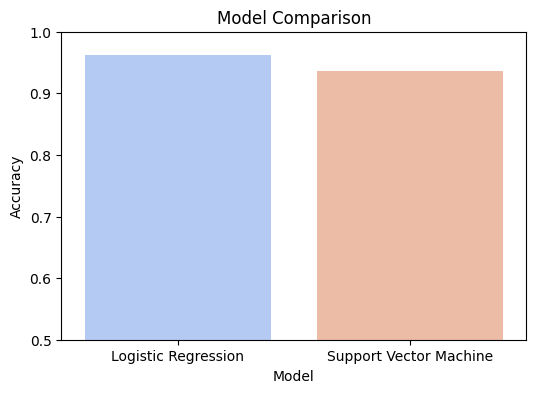

In [ ]:
# Compare accuracy scores
log_accuracy = accuracy_score(y_test, y_pred_log)
nb_accuracy = accuracy_score(y_test, nb_preds)

comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine'],
    'Accuracy': [log_accuracy, nb_accuracy]
})

print(comparison_df)

# Visualization
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette='coolwarm')
plt.title('Model Comparison')
plt.ylim(0.5, 1.0)
plt.show()


In [ ]:
# Sample new data for prediction
new_texts = [
    "NASA successfully launched a new satellite designed to study climate change from space.",
"Researchers have found a potential cure for a common type of cancer, providing hope to millions.",
"Local authorities have announced plans to build new parks and recreational areas for the city's residents.",
"A new report reveals that global literacy rates have reached their highest levels in history.",
"Scientists are warning about the rapid decline of bee populations, which could affect global agriculture.",
"A secret society of world leaders has been manipulating global events for decades, according to new leaked documents.",
"A new cryptocurrency, backed by a mysterious billionaire, is set to replace traditional money by next year.",
"Government officials are secretly building underground bunkers to protect against an impending alien invasion.",
"Climate change experts claim that ice caps are melting faster than previously predicted, causing global sea levels to rise dramatically.",
"Reports have surfaced that the moon landing in 1969 was staged and never actually occurred."

]

# Preprocess and vectorize the new data
new_texts_cleaned = [clean_text(text) for text in new_texts]
new_texts_tfidf = vectorizer.transform(new_texts_cleaned)

# Predict using nb
nb_prediction = nb_model.predict(new_texts_tfidf)
print("SVM Predictions:", nb_prediction)

# Predict using Logistic Regression
log_prediction = log_model.predict(new_texts_tfidf)
print("Logistic Regression Predictions:", log_prediction)


SVM Predictions: [1 1 0 1 1 1 1 1 0 1]
Logistic Regression Predictions: [1 1 1 1 1 1 1 1 1 1]


In [ ]:
# Save the model
joblib.dump(nb_model, 'nb_model.pkl')
print("NB model saved.")


NB model saved.
